In [5]:
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate


# Load the movielens-100k dataset (download it if needed),
data = Dataset.load_builtin('ml-100k')

# We'll use the famous SVD algorithm.
algo = SVD()

# Run 5-fold cross-validation and print results
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9517  0.9375  0.9273  0.9363  0.9355  0.9377  0.0079  
MAE (testset)     0.7496  0.7385  0.7320  0.7409  0.7379  0.7398  0.0057  
Fit time          4.26    4.56    4.69    4.55    4.48    4.51    0.14    
Test time         0.17    0.12    0.11    0.15    0.16    0.14    0.02    


{'test_rmse': array([0.95166726, 0.93754198, 0.92730013, 0.93630844, 0.9354974 ]),
 'test_mae': array([0.74960276, 0.73847061, 0.73196733, 0.74089586, 0.73789009]),
 'fit_time': (4.260970115661621,
  4.560225963592529,
  4.694051027297974,
  4.553861141204834,
  4.48004674911499),
 'test_time': (0.16677212715148926,
  0.11795783042907715,
  0.1128237247467041,
  0.1496269702911377,
  0.1605081558227539)}

In [6]:
from surprise import SVD
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import train_test_split

# Load the movielens-100k dataset (download it if needed),
data = Dataset.load_builtin('ml-100k')

# sample random trainset and testset
# test set is made of 25% of the ratings.
trainset, testset = train_test_split(data, test_size=.25)

# We'll use the famous SVD algorithm.
algo = SVD()

# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)
predictions = algo.test(testset)

# Then compute RMSE
accuracy.rmse(predictions)

In [12]:
from surprise import KNNBasic
from surprise import Dataset

# Load the movielens-100k dataset
data = Dataset.load_builtin('ml-100k')

# Retrieve the trainset.
trainset = data.build_full_trainset()

# Build an algorithm, and train it.
algo = KNNBasic()
algo.fit(trainset)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [14]:
uid = str(196)  # raw user id (as in the ratings file). They are **strings**!
iid = str(302)  # raw item id (as in the ratings file). They are **strings**!

# get a prediction for specific users and items.
pred = algo.predict(uid, iid, r_ui=4, verbose=True)

user: 196        item: 302        r_ui = 4.00   est = 4.06   {'actual_k': 40, 'was_impossible': False}


In [46]:
kNeighbors

[(10, 1.0),
 (11, 1.0),
 (13, 1.0),
 (24, 1.0),
 (36, 1.0),
 (44, 1.0),
 (45, 1.0),
 (51, 1.0),
 (53, 1.0),
 (61, 1.0)]

In [3]:
similarUsers

[(0, 0.0),
 (1, 0.9317437101818368),
 (2, 0.9462368828208907),
 (3, 0.9540317361976572),
 (4, 0.9653265298427278),
 (5, 0.9401267913629436),
 (6, 0.9400416732995409),
 (7, 0.9617144342731783),
 (8, 0.8569867148959759),
 (9, 0.9994838709333602),
 (10, 1.0),
 (11, 1.0),
 (12, 0.9378700239028726),
 (13, 1.0),
 (14, 0.9019531874292673),
 (15, 0.9191450300180578),
 (16, 0.8677956432513021),
 (17, 0.9823974175160344),
 (18, 0.907534543902125),
 (19, 0.8874250130080685),
 (20, 0.9461389844312209),
 (21, 0.9350354811229232),
 (22, 0.9434894296825902),
 (23, 0.9819388074905946),
 (24, 1.0),
 (25, 0.9222213677773493),
 (26, 0.9082682792306083),
 (27, 0.8547043234472846),
 (28, 0.0),
 (29, 0.9303425112253353),
 (30, 0.9128709291752768),
 (31, 0.9563015167404944),
 (32, 0.9384996000012742),
 (33, 0.9625265270969021),
 (34, 0.8),
 (35, 0.9133714890249096),
 (36, 1.0),
 (37, 0.9702345438513523),
 (38, 0.9754804241786637),
 (39, 0.0),
 (40, 0.9676724936112584),
 (41, 0.9703085034952702),
 (42, 0.8965

In [8]:
from MovieLens import MovieLens
from surprise import KNNBasic
import heapq
from collections import defaultdict
from operator import itemgetter
        
testSubject = '85'
k = 10

# Load our data set and compute the user similarity matrix
ml = MovieLens()
data = ml.loadMovieLensLatestSmall()

trainSet = data.build_full_trainset()

sim_options = {'name': 'cosine',
               'user_based': True
               }

model = KNNBasic(sim_options=sim_options)
model.fit(trainSet)
simsMatrix = model.compute_similarities()

# Get top N similar users to our test subject
# (Alternate approach would be to select users up to some similarity threshold - try it!)
testUserInnerID = trainSet.to_inner_uid(testSubject)
similarityRow = simsMatrix[testUserInnerID]

similarUsers = []
for innerID, score in enumerate(similarityRow):
    if (innerID != testUserInnerID):
        similarUsers.append( (innerID, score) )

kNeighbors = heapq.nlargest(k, similarUsers, key=lambda t: t[1])

# Get the stuff they rated, and add up ratings for each item, weighted by user similarity
candidates = defaultdict(float)
for similarUser in kNeighbors:
    innerID = similarUser[0]
    userSimilarityScore = similarUser[1]
    theirRatings = trainSet.ur[innerID]
#     print(theirRatings)
    for rating in theirRatings:
        candidates[rating[0]] += (rating[1] / 5.0) * userSimilarityScore
#         print(candidates[rating[0]])
    
# Build a dictionary of stuff the user has already seen
watched = {}
for itemID, rating in trainSet.ur[testUserInnerID]:
    watched[itemID] = 1
    
# Get top-rated items from similar users:
pos = 0
for itemID, ratingSum in sorted(candidates.items(), key=itemgetter(1), reverse=True):
    if not itemID in watched:
        movieID = trainSet.to_raw_iid(itemID)
        print(ml.getMovieName(int(movieID)), ratingSum)
        pos += 1
        if (pos > 10):
            break

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Inception (2010) 3.3
Star Wars: Episode V - The Empire Strikes Back (1980) 2.4
Bourne Identity, The (1988) 2.0
Crouching Tiger, Hidden Dragon (Wo hu cang long) (2000) 2.0
Dark Knight, The (2008) 2.0
Good, the Bad and the Ugly, The (Buono, il brutto, il cattivo, Il) (1966) 1.9
Departed, The (2006) 1.9
Dark Knight Rises, The (2012) 1.9
Back to the Future (1985) 1.9
Gravity (2013) 1.8
Fight Club (1999) 1.8


In [7]:
sorted(candidates.items(), key=itemgetter(1), reverse=True)

[(564, 3.3),
 (179, 2.4),
 (558, 2.0),
 (470, 2.0),
 (137, 2.0),
 (553, 1.9),
 (559, 1.9),
 (571, 1.9),
 (197, 1.9),
 (576, 1.8),
 (122, 1.8),
 (350, 1.8),
 (749, 1.8),
 (1421, 1.8),
 (1592, 1.8),
 (103, 1.7000000000000002),
 (552, 1.7000000000000002),
 (113, 1.7000000000000002),
 (121, 1.7000000000000002),
 (1266, 1.7000000000000002),
 (632, 1.7000000000000002),
 (598, 1.7),
 (2486, 1.7),
 (1512, 1.7),
 (143, 1.6),
 (1297, 1.6),
 (99, 1.6),
 (409, 1.4),
 (644, 1.3),
 (800, 1.3),
 (392, 1.2),
 (1154, 1.2),
 (497, 1.2),
 (24, 1.0),
 (49, 1.0),
 (551, 1.0),
 (446, 1.0),
 (557, 1.0),
 (577, 1.0),
 (505, 1.0),
 (582, 1.0),
 (187, 1.0),
 (107, 1.0),
 (583, 1.0),
 (604, 1.0),
 (611, 1.0),
 (613, 1.0),
 (617, 1.0),
 (645, 1.0),
 (725, 1.0),
 (171, 1.0),
 (391, 1.0),
 (59, 1.0),
 (101, 1.0),
 (736, 1.0),
 (738, 1.0),
 (327, 1.0),
 (778, 1.0),
 (204, 1.0),
 (2208, 1.0),
 (244, 1.0),
 (351, 1.0),
 (473, 1.0),
 (158, 1.0),
 (3125, 1.0),
 (3126, 1.0),
 (2499, 1.0),
 (100, 1.0),
 (429, 1.0),
 (2294

In [34]:
%matplotlib inline

In [38]:
simsMatrix.shape

(671, 671)

In [11]:
import pandas as pd

In [13]:
df = pd.read_csv('../ml-latest-small/ratings.csv')

In [ ]:
df.

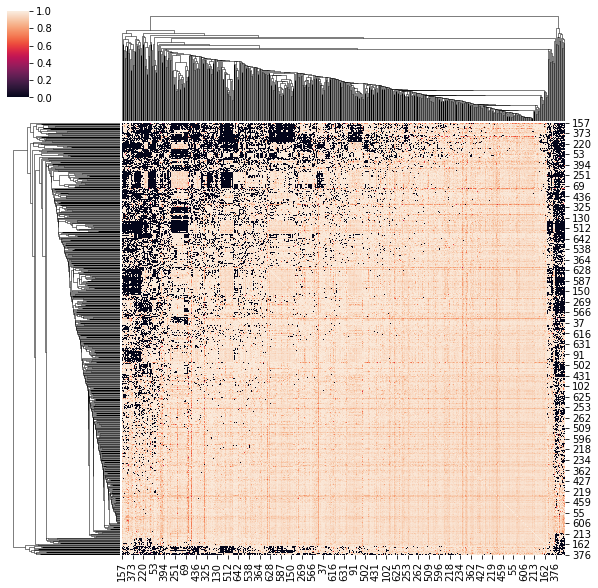

In [35]:

import seaborn as sns

sns.clustermap(simsMatrix)

In [10]:
# pd.DataFrame

# trainSet.to_inner_uid('18')



17

In [19]:
simsMatrix.shape

(9066, 9066)

In [18]:
from MovieLens import MovieLens
from surprise import KNNBasic
import heapq
from collections import defaultdict
from operator import itemgetter
        
testSubject = '85'
k = 10

ml = MovieLens()
data = ml.loadMovieLensLatestSmall()

trainSet = data.build_full_trainset()

sim_options = {'name': 'cosine',
               'user_based': False
               }

model = KNNBasic(sim_options=sim_options)
model.fit(trainSet)
simsMatrix = model.compute_similarities()

testUserInnerID = trainSet.to_inner_uid(testSubject)

# Get the top K items we rated
testUserRatings = trainSet.ur[testUserInnerID]
kNeighbors = heapq.nlargest(k, testUserRatings, key=lambda t: t[1])

# Get similar items to stuff we liked (weighted by rating)
candidates = defaultdict(float)
for itemID, rating in kNeighbors:
    similarityRow = simsMatrix[itemID]
    for innerID, score in enumerate(similarityRow):
        candidates[innerID] += score * (rating / 5.0)
#         candidates[innerID] += score * ((rating-2.5) / 2.5)
# Build a dictionary of stuff the user has already seen
watched = {}
for itemID, rating in trainSet.ur[testUserInnerID]:
    watched[itemID] = 1
    
# Get top-rated items from similar users:
pos = 0
for itemID, ratingSum in sorted(candidates.items(), key=itemgetter(1), reverse=True):
    if not itemID in watched:
        movieID = trainSet.to_raw_iid(itemID)
        print(ml.getMovieName(int(movieID)), ratingSum)
        pos += 1
        if (pos > 10):
            break

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
James Dean Story, The (1957) 10.0
Get Real (1998) 9.987241120712646
Kiss of Death (1995) 9.966881877751941
Set It Off (1996) 9.963732215657119
How Green Was My Valley (1941) 9.943984081065269
Amos & Andrew (1993) 9.93973694500253
My Crazy Life (Mi vida loca) (1993) 9.938290487546041
Grace of My Heart (1996) 9.926255896645218
Fanny and Alexander (Fanny och Alexander) (1982) 9.925699671455906
Wild Reeds (Les roseaux sauvages) (1994) 9.916226404418774
Edge of Seventeen (1998) 9.913028764691676


In [12]:
testUserRatings
kNeighbors

[(650, 5.0),
 (20, 5.0),
 (27, 5.0),
 (4206, 5.0),
 (387, 5.0),
 (49, 5.0),
 (423, 5.0),
 (99, 5.0),
 (145, 5.0),
 (55, 5.0)]

In [24]:
from MovieLens import MovieLens
from surprise import SVD, SVDpp
from surprise import NormalPredictor
from Evaluator import Evaluator

import random
import numpy as np

def LoadMovieLensData():
    ml = MovieLens()
    print("Loading movie ratings...")
    data = ml.loadMovieLensLatestSmall()
    print("\nComputing movie popularity ranks so we can measure novelty later...")
    rankings = ml.getPopularityRanks()
    return (ml, data, rankings)

np.random.seed(0)
random.seed(0)

# Load up common data set for the recommender algorithms
(ml, evaluationData, rankings) = LoadMovieLensData()

# Construct an Evaluator to, you know, evaluate them
evaluator = Evaluator(evaluationData, rankings)

# SVD
SVD = SVD()
evaluator.AddAlgorithm(SVD, "SVD")

# SVD++
SVDPlusPlus = SVDpp()
evaluator.AddAlgorithm(SVDPlusPlus, "SVD++")

# Just make random recommendations
Random = NormalPredictor()
evaluator.AddAlgorithm(Random, "Random")

# Fight!
evaluator.Evaluate(False)

evaluator.SampleTopNRecs(ml)

Loading movie ratings...

Computing movie popularity ranks so we can measure novelty later...
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating  SVD ...
Evaluating accuracy...
Analysis complete.
Evaluating  SVD++ ...
Evaluating accuracy...
Analysis complete.
Evaluating  Random ...
Evaluating accuracy...
Analysis complete.


Algorithm  RMSE       MAE       
SVD        0.9039     0.6984    
SVD++      0.8943     0.6887    
Random     1.4359     1.1493    

Legend:

RMSE:      Root Mean Squared Error. Lower values mean better accuracy.
MAE:       Mean Absolute Error. Lower values mean better accuracy.

Using recommender  SVD

Building recommendation model...
Computing recommendations...

We recommend:
Gladiator (1992) 4.520884890007874
Philadelphia Story, The (1940) 4.420701711947352
Stand by Me (1986) 4.3959589752178365
Moon (2009) 4.372613693384055
Happiness (1998) 4.369493252705134
American Graffiti (1973) 4.3534706001